**Name: Suryajiraje Bhosale**

**Date: 17-07-2021**

**PRN: 1901202051**

**School: Data Science**

**Program: B.Sc. Data Science**

**Year/ Semester: 2nd / 4th**

**Subject Name: Machine Learning 2**

**Subject Code: DS401**

**Title: Customer Segmentation using Clustering.**

**Skills/Competencies to be acquired:**

1. Application of clustering

2. Visualisation

3. Customer segmentation

**Duration of activity: 1 Hour**

**1. What is the purpose of this activity?**

The purpose of this activity is to apply clustering algoritms for choosing optimal number of clusters in order to facilitate customer segmentation.

**2. Steps performed in this activity.**

1. Import the required modules and read the data.

2. Check for missing values.

3. Create a pivot table and then a sparse matrix denoting the customer's offer selection (1 = yes / 0 = no).

4. Visualise using elbow method and dendrogram for k-Means and hierarchical clustering respectively and choose the optimal k value to segement customers into several groups.

5. Note your output.

**3. What resources / materials / equipment / tools did you use for this activity?**

• Jupyter Notebook

• Lecture notes

• Google, Google Meet

• MS Word, MS Excel

• Websites: W3Resources, Towards Data Science

**4. What skills did you acquire?**

• Able to apply several clustering algorithm.

• Able to select the most suitable algorithm.

• Able to perform EDA and derive actionable insights.

**5. Time taken to complete the activity?**

1 Hour.

-------------------------------------------------------------------------------------------------------------------------------

**Importing essential modules:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
sns.set_context("talk")
import warnings
warnings.filterwarnings("ignore")

In [2]:
offers = pd.read_excel('CustomerSegmentation.xlsx',sheet_name='OfferInformation')
offers.head(4)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True


In [3]:
transactions = pd.read_excel('CustomerSegmentation.xlsx',sheet_name='Transactions')
transactions.head(4)
transactions['n'] = 1
transactions.head()

,Customer Last Name,Offer #,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [4]:
print("Missing values:\n")
print("Sheet 1:",offers.isna().sum().sum())
print("Sheet 2:",transactions.isna().sum().sum())

Missing values:

Sheet 1: 0
Sheet 2: 0


**Q1. Create a data frame (Sparse matrix) where each row has the following columns:**

**a. Customer Last Name**  

**b. One column for each offer, with a 1 if the customer responded to the offer.**

In [5]:
result = pd.merge(transactions,offers,on="Offer #")
table = pd.pivot_table(result,index='Customer Last Name',columns ="Offer #",values="n")
table.fillna(0,inplace=True)
table.reset_index(inplace=True)
table.head()

Offer #,Customer Last Name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Comment:** 

First we created a variable in the 'transactions' datasheet called 'n' which indicates that the customer has opted that particular column (basically a tally). Then we merged the 2 datasheets 'offers' and 'transactions' into one and named it 'results'. 

After that, we created a pivot table based on 'n' i.e. if that particular customer has opted any one or more than one of the 32 offers or not. A pivot table is created. In that pivot table, n=1 indicates that the customer has opted for the offer and 0 if the customer has not.

**Q2.1. Create a numpy matrix 'x_cols' with only the columns representing the offers (i.e. the 0/1 columns)**

**Q2.2. What values of $SS$ do you believe represent better clusterings? Why? Write code that applies the clustering method from scikit-learn to this matrix.**

In [6]:
#2.1. Transforming our pivot table 'table' into a numpy sparse matrix for ease of computation

x_cols = table.columns[2:]         #we are selecting from column no. 2 onwards since we don't want indexes or customer names
x_cols = np.matrix(table[x_cols])

**Using kMeans clustering first:**

In [12]:
#2.2. 

#1) kMeans clustering: making an elbow plot of the wcss (inertia) versus k-values 

from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10,11]
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_cols)
    wcss.append(kmeans.inertia_)

ss_vals = pd.DataFrame(wcss,columns=["WCSS"])
ss_vals

,WCSS
0,272.900000
1,243.090278
2,220.025639
3,206.286111
4,195.413015
5,187.823250
6,179.309324
7,172.388289
8,167.321501
9,159.945635


Text(0, 0.5, 'Within Cluster Sum of Squares (WCSS)')

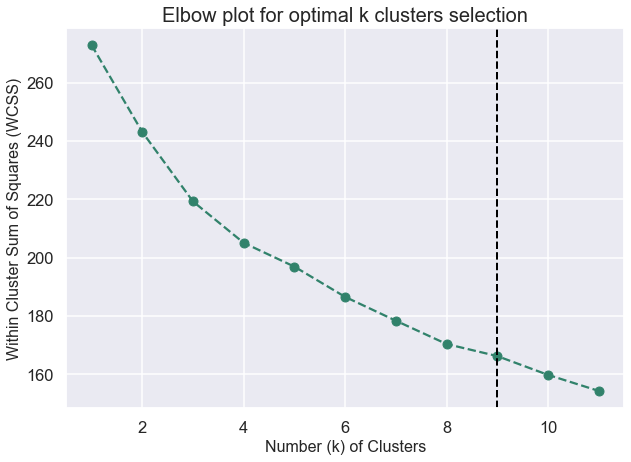

In [8]:
plt.figure(figsize=(10,7))
plt.plot(k_values,wcss,marker="o",color="#31826b",ls="--")
plt.title("Elbow plot for optimal k clusters selection",size=20)
plt.xlabel("Number (k) of Clusters",size=16)
plt.axvline(x=9,ls="--",linewidth=2,c='k')
plt.ylabel("Within Cluster Sum of Squares (WCSS)",size=16)

**Trying with Hierarchical clustering now:**

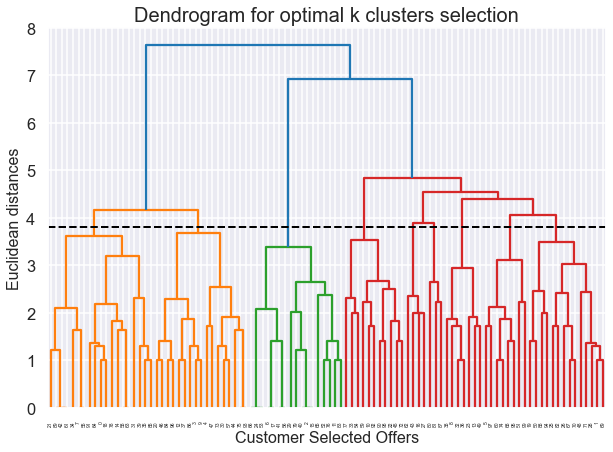

In [10]:
#2.2. 

#2) Hierarchical clustering: making a dendrogram to select the optimal clusters 
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(x_cols, method="ward"))
plt.title("Dendrogram for optimal k clusters selection",size=20)
plt.xlabel("Customer Selected Offers",size=16)
plt.ylabel("Euclidean distances",size=16)
plt.axhline(y=3.8,ls="--",linewidth=2,c='k')
plt.show()

**Comments:**

We first created a sparse numpy matrix called "x_cols" from the pivot table (excluding the index and customer name) and trained it first using k-Means clustering algorithm to plot an elbow curve so as to select the optimal cluster. Via the elbow plot, upon passing a vertical line, it can be seen that there is a plummet in the k = 9 region, which was a trivial observation. 

The downside of k-Means algorithm is that it requires us to explicitly mention the number of clusters before training. To overcome this, we used hierarchical clustering. For this, we first plot a Dendrogram using Euclidean distance as the distance parameter and Ward method for interlinkage of clades/leaves of the dendrogram.

Upon passing a horizontal line from the biggest, most symmetrical clades with no overlapping clades, it can be sen that the optimal number of clusters is indeed 9 (which had already been deduced in the elbow plot); since, the horizontal line passes through 9 vertical clades/leaves.

**Q3. Make a bar chart showing the number of points in each cluster for k-Means under the best $K$.**

Text(0.5, 1.0, 'Frequency per Cluster')

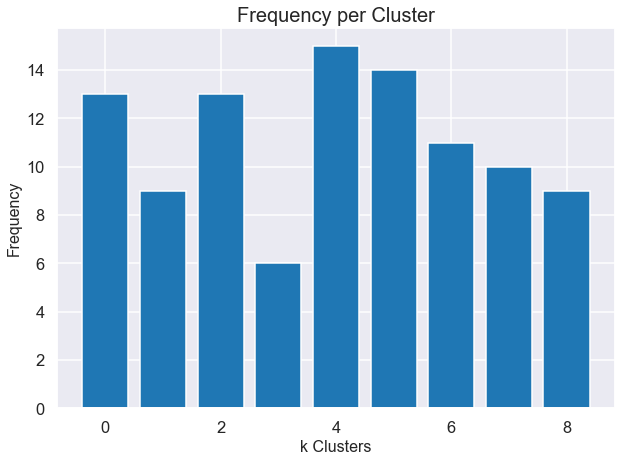

In [14]:
opt_k = 9
table["Cluster"] = KMeans(n_clusters = opt_k).fit_predict(x_cols)
plt.figure(figsize=(10,7))
plt.bar(table["Cluster"].unique(),table["Cluster"].value_counts(),align="center")
plt.xlabel("k Clusters",size=16)
plt.ylabel("Frequency",size=16)
plt.title("Frequency per Cluster",size=20)

**Comment:** Cluster 4 has the highest frequency and cluster 3 has the lowest frequency.

**Q4. What challenges did you experience using the Elbow method to pick  $K$?**

**A4.** When I plotted an elbow curve, there was a negligible drop observed between k = 8 and k = 9 which made the options ambigous and hard to pick a definite k value. However, as an alternative, I chose the hierarchical clustering algorithm to plot a dendrogram. This dendrogram gave a definite answer of optimal clusters i.e. k = 9.

**Q5. Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?**

In [21]:
from sklearn.metrics import silhouette_score

In [55]:
from sklearn import metrics 
num_clusters = 11
kmeans_model = KMeans(n_clusters=num_clusters,random_state=1).fit(x_cols)
cluster_labels = kmeans_model.labels_
silhouette_values = metrics.silhouette_samples(x_cols,cluster_labels)

means_lst = []
for label in range(num_clusters):
    means_lst.append(silhouette_values[cluster_labels == label].mean())

In [56]:
ms_score = pd.DataFrame(means_lst,columns=["Avg Silhouette Score"])
ms_score

,Avg Silhouette Score
0,0.165356
1,0.087676
2,0.026188
3,0.471093
4,-0.063256
5,0.212673
6,0.108636
7,0.224354
8,0.056734
9,0.142448


Text(0, 0.5, 'Average Silouette Score')

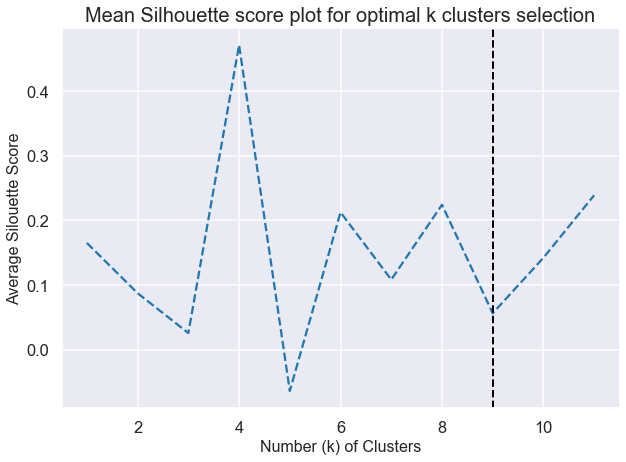

In [57]:
plt.figure(figsize=(10,7))
plt.plot(k_values,means_lst,ls="--")
plt.title("Mean Silhouette score plot for optimal k clusters selection",size=20)
plt.xlabel("Number (k) of Clusters",size=16)
plt.axvline(x=9,ls="--",linewidth=2,c='k')
plt.ylabel("Average Silouette Score",size=16)

**Comment:** Upon several iterations, k = 9 seems to be the best performer. It does not differ from what k value we picked in the elbow plot.